# Imports

In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
#%matplotlib.inline
from deepface import DeepFace

import os
import collections

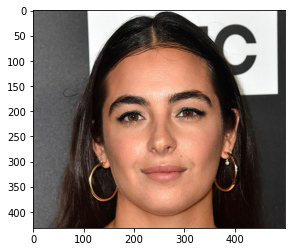

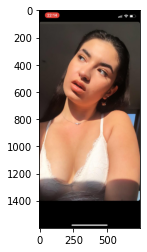

You DONT look alike!


In [3]:
def verify(img1_path, img2_path):
    match = None

    img1 = cv2.imread(img1_path)
    img2 = cv2.imread(img2_path)

    plt.imshow(img1[:, :, ::-1 ]) # SHOWS IMAGES
    plt.show()
    plt.imshow(img2[:, :, ::-1 ])
    plt.show()

    result = DeepFace.verify(img1_path, img2_path, model_name='Facenet512', distance_metric='euclidean_l2', enforce_detection=False)
    list_result = list(result.items())
    #print('Result:\t', list_result) #RESULTS

    if list_result[1][1] > 1.15: # CHANGE HOW SIMILAR THE PHOTOS NEED TO BE
        print('You DONT look alike!')
    else:
        match = True
        print(''' 'Match = ' + str(match) + ''' 'You DO look alike')
  
    return match

verify('Profiles/User_1_profile_JOSH/request_pics/user1_pic1_request_1.jpg', 'Profiles/User_2_profile_LEYLA/profile_pics/user2_pic1_pp_2.jpg')

In [ ]:
def full_match(requests, profile):
    directory = 'Profiles/'
    match = None

    holder = requests
    requests = profile
    request_paths = []
    for dirpath, subdirs, files in os.walk(directory):
        for x in files:
            if x.endswith('request_' + str(requests) + '.jpg'): # CHANGE FILE END NAME
                request_paths.append(os.path.join(dirpath, x))
    print(request_paths)

    profile = holder
    pic_paths = []
    for dirpath, subdirs, files in os.walk(directory):
        for x in files:
            if x.endswith('pp_' + str(profile) + '.jpg'): # CHANGE FILE END NAME
                pic_paths.append(os.path.join(dirpath, x))
    print(pic_paths)

    for i in request_paths:
        for j in pic_paths:
            result = verify(i, j)
            if result == True:
                match = True
        
    if match == True:
        return print('Its a MATCH!')
    if match != True :
        return print('No Match!')

In [ ]:
def matching_algo():
    requests = None
    profile = None

    half = None
    #match = None

    directory = 'Profiles/'
    user_id = 1

    for i in os.listdir(directory):
        for j in os.listdir(directory):
        #if requests == None:
            requests = user_id
            request_paths = []
            for dirpath, subdirs, files in os.walk(directory):
                for x in files:
                    if x.endswith('request_' + str(requests) + '.jpg'): # CHANGE FILE END NAME
                        request_paths.append(os.path.join(dirpath, x))
            print(request_paths)
        #else:
            if user_id == requests:
                user_id += 1
            profile = user_id
            pic_paths = []
            for dirpath, subdirs, files in os.walk(directory):
                for x in files:
                    if x.endswith('pp_' + str(profile) + '.jpg'): # CHANGE FILE END NAME
                        pic_paths.append(os.path.join(dirpath, x))
            print(pic_paths)


        #user_id += 1
        
            for j in request_paths:
                for k in pic_paths:
                    result = verify(j, k)
                    if result == True:
                        half = True

        

            if half == True:
                print('Half Match!')
                full_match(requests, profile)
            else:
                print('No Half-Match')
        
    return

matching_algo()

# 2400s Runtime --WITH PICS
# 177.7s Runtime --WITHOUT PICS